# Pfizer Sentiment Analysis using Python

* The WHO Strategic Advisory Group of Experts on Immunization (SAGE) has issued interim recommendations for the use of the Pfizer BioNTech (BNT162b2) vaccine against COVID-19
* This article provides a summary of those interim recommendations; you may access the full guidance document

The Global Advisory Committee on Vaccine Safety (GACVS), a group of experts that provides independent and authoritative guidance to WHO on the topic of safe vaccine use, receives and assesses reports of suspected safety events of potentially international impact. In October 2021, the GACVS COVID-19 subcommittee concluded that the mRNA COVID-19 vaccines have clear benefits in all age groups in reducing hospitalizations and deaths due to COVID-19.

A very rare serious adverse event is myocarditis, which is mainly observed in young males aged 18-35 after the second dose.  These myocarditis cases typically occurred within a few days after vaccination, are generally mild, respond to conservative treatment, and are less severe with better outcomes than classical myocarditis or COVID-19 related myocarditis

* Source https://www.who.int/news-room/feature-stories/detail/who-can-take-the-pfizer-biontech-covid-19--vaccine-what-you-need-to-know


In this Sentiment analysis, we would be using;

* VADER (Valence Aware Dictionary and Sentiment Reasoner)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv('vaccination_tweets.csv')
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [2]:
data.shape

(11020, 16)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [4]:
data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,1.102000e+04,1.102000e+04,11020.000000,1.102000e+04,11020.000000,11020.000000
mean,1.372977e+18,3.518827e+04,1170.470236,1.533289e+04,1.360436,7.510617
std,3.311622e+16,2.942509e+05,2798.429673,4.944401e+04,11.364732,51.192608
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.347623e+18,1.110000e+02,164.000000,4.360000e+02,0.000000,0.000000
50%,1.360274e+18,4.790000e+02,460.000000,2.323500e+03,0.000000,1.000000
75%,1.395234e+18,2.171250e+03,1221.000000,1.114075e+04,1.000000,4.000000
max,1.463244e+18,1.371493e+07,103226.000000,1.213794e+06,678.000000,2315.000000


In [5]:
#checking to see if there are any duplicated values in the dataset
data.duplicated().sum()

0

In [6]:
#Checking for null values
data.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [7]:
#drop  rows containing null values
data = data.dropna()

In [8]:
#verify if all null data has been dropped
data.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

## Exploratory Data Analysis

Text(0, 0.5, 'count')

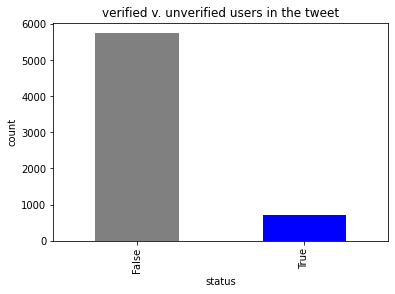

In [9]:
color = ['grey', 'blue']
data['user_verified'].value_counts().plot(kind = 'bar', color = color)
plt.title('verified v. unverified users in the tweet')
plt.xlabel('status')
plt.ylabel('count')

The blue bar represents tweets from verified users while the grey bar represents tweets from unverified users.

In [10]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


In [11]:
data['source'].value_counts()

Twitter for iPhone                2109
Twitter Web App                   1848
Twitter for Android               1496
TweetDeck                          481
Twitter for iPad                   159
Instagram                          130
Buffer                              47
Hootsuite Inc.                      31
LinkedIn                            16
Microsoft Power Platform            13
IFTTT                               13
Tweetbot for iΟS                     9
Revive Social App                    8
Paper.li                             7
Sprinklr Publishing                  7
24liveblog                           7
Article Tweetbot                     6
dlvr.it                              6
Salesforce - Social Studio           5
Blog2Social APP                      5
WordPress.com                        5
Twitter Media Studio - LiveCut       4
Nelio Content                        4
Sendible                             4
Twitter for Mac                      4
SEMrush Social Media Tool

In [12]:
followers = data[(data['user_followers'] > 400) & (data['user_verified'] == True)]
followers.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
15,1337789467038523394,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,2020-12-12 16:00:38,Trump announces #vaccine rollout 'in less than...,['vaccine'],Twitter for iPhone,0,1,False
17,1337783770070409218,ILKHA,Türkiye,Official Twitter account of Ilke News Agency /,2015-05-22 08:31:12,4056,6,3,True,2020-12-12 15:38:00,"Coronavirus: Iran reports 8,201 new cases, 221...","['Iran', 'coronavirus', 'PfizerBioNTech']",TweetDeck,3,5,False
22,1337773965595598848,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,2020-12-12 14:59:02,Trump announces #vaccine rollout 'in less than...,['vaccine'],Buffer,1,0,False
43,1337728701820268544,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,2020-12-12 11:59:10,Trump announces #vaccine rollout 'in less than...,['vaccine'],Twitter Web App,0,2,False
44,1337727767551553536,Daily News Egypt,Egypt,Egypt's Only Daily Independent Newspaper in En...,2009-04-26 07:56:24,278080,116,765,True,2020-12-12 11:55:28,#FDA authorizes #PfizerBioNTech #coronavirus v...,"['FDA', 'PfizerBioNTech', 'coronavirus']",Twitter Web App,1,1,False


In [13]:
retweets = data[(data['retweets'] >3)]
retweets

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
57,1338612922600333315,Kris LaGrange,"LI, NYC, NJ, PA, NE, USA",UCOMM Blog aggregates activist news you can us...,2011-01-27 21:42:20,24686,6077,2994,False,2020-12-14 22:32:45,Members of the @teamsters delivered the first ...,"['COVID19Vaccine', 'teamsters', 'UPS', 'COVID1...",Twitter Web App,8,18,False
64,1338594342265556995,Emily Manley,"Jefferson City, MO",#MO Chief Capitol reporter for @FOX2now @KPLR1...,2012-12-19 08:19:33,1494,1646,20205,False,2020-12-14 21:18:55,#INBOX | @GovParsonMO says shipments of the #P...,"['INBOX', 'PfizerBioNTech']",Twitter for iPhone,5,3,False
101,1338539742888079360,Julie Dzerowicz,"Davenport, Toronto",Your Member of Parliament for Davenport. #Dave...,2013-10-06 21:34:47,8131,685,3066,True,2020-12-14 17:41:58,"Last night, the first #COVID19Vaccines arrived...",['COVID19Vaccines'],TweetDeck,4,15,False
109,1338514087005794305,AFP News Agency,France,Top news and features from AFP's reporters aro...,2011-09-27 00:35:10,1953417,618,2338,True,2020-12-14 16:00:01,#UPDATE A nurse in New York City on Monday bec...,['UPDATE'],TweetDeck,7,21,False
122,1338483026905411586,Kristen Rogers MD MPH,"New Orleans, LA",Internal Medicine Hospitalist @OchsnerHealth A...,2017-12-15 19:16:58,258,226,804,False,2020-12-14 13:56:36,"The end is in sight, many of my coworkers and ...","['PfizerBioNTech', 'CovidVaccine']",Twitter for iPhone,6,24,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10779,1451184063906148372,Donato Porreca,"Milano, Lombardia",Dott. in Economia e Commercio - Dott. in Scien...,2020-05-17 12:08:43,1958,1758,2941,False,2021-10-21 13:50:17,Canaglie !\n#vaccini #COVID19 #DittaturaSanita...,"['vaccini', 'COVID19', 'DittaturaSanitaria', '...",Twitter for Android,5,7,False
10807,1450191171263909894,Ashley Johns,The Twilight Zone,. #UnitedWeStand,2020-08-16 17:22:35,274,602,2263,False,2021-10-18 20:04:53,Then WHY didn't #PfizerBioNtech require SAGE a...,['PfizerBioNtech'],Twitter for iPhone,5,18,False
10831,1448557769833914375,Focus Taiwan (CNA English News),Central News Agency (CNA),"Daily news from & about Taiwan, local paper he...",2009-07-27 06:41:57,55298,838,3373,False,2021-10-14 07:54:19,Taiwan on Thursday received a new shipment of ...,['PfizerBioNTech'],Twitter Web App,4,18,False
10884,1455932427365408769,Arab News,Saudi Arabia,The Voice of a Changing Region. Established in...,2009-08-27 02:15:51,399036,42,14,True,2021-11-03 16:18:35,The approval of the #PfizerBioNTech #COVID19 v...,"['PfizerBioNTech', 'COVID19', 'SaudiArabia']",Twitter Web App,5,10,False


##### Randomly viewing the text column to know the amount of cleaning to be done

In [14]:
data['text'][0:7]

0     Same folks said daikon paste could treat a cyt...
2     #coronavirus #SputnikV #AstraZeneca #PfizerBio...
6     it is a bit sad to claim the fame for success ...
9     #CovidVaccine \n\nStates will start getting #C...
10    while deaths are closing in on the 300,000 mar...
15    Trump announces #vaccine rollout 'in less than...
16    UPDATED: #YellowFever &amp; #COVID19 #Immunity...
Name: text, dtype: object

### Data Cleaning

* remove stopwords
* remove punctations
* remove characters
* remove noise
* remove web addresses

In [15]:
#pip install neattext


In [16]:
data.iloc[16]['text']

"💉 #Vaccine #TrumpVaccine #AstraZeneca #PfizerBioNTech #Pfizervaccine #PfizerCovidVaccine  #Pfizer's COVID-19 belong… https://t.co/ldxQhN6uix"

* Remove web address
* Remove hashtags
* Remove Emojis
* Remove punctuations

In [17]:
#loading text neattext 
import neattext as nt
import neattext.functions as nxt

In [18]:
dir(nxt)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [19]:
#checking Methods and Atrributes
dir(nt)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

Noise scan
* NOise scan scans the dataframe( text ) column to determine the amount of data we need to clean

In [20]:
#compares the amount of unnecessary characterss stopwords in their proportions
data['text'].apply(lambda x : nt.TextFrame(x).noise_scan())


0        {'text_noise': 9.278350515463918, 'text_length...
2        {'text_noise': 7.857142857142857, 'text_length...
6        {'text_noise': 12.23021582733813, 'text_length...
9        {'text_noise': 5.755395683453238, 'text_length...
10       {'text_noise': 14.285714285714285, 'text_lengt...
                               ...                        
11011    {'text_noise': 6.451612903225806, 'text_length...
11012    {'text_noise': 10.0, 'text_length': 140, 'nois...
11013    {'text_noise': 13.571428571428571, 'text_lengt...
11014    {'text_noise': 10.784313725490197, 'text_lengt...
11018    {'text_noise': 8.571428571428571, 'text_length...
Name: text, Length: 6467, dtype: object

In [21]:
data['text']

0        Same folks said daikon paste could treat a cyt...
2        #coronavirus #SputnikV #AstraZeneca #PfizerBio...
6        it is a bit sad to claim the fame for success ...
9        #CovidVaccine \n\nStates will start getting #C...
10       while deaths are closing in on the 300,000 mar...
                               ...                        
11011    #PfizerBioNTech has given me a worse headache ...
11012    Yes. Children ages 5–11 years receive one-thir...
11013    And back to #Harlequins #COYQ  for the booster...
11014    @ruvanw @GMalavige @chandi2012 I already had m...
11018    #PfizerBioNTech has developed new pill #Paxlov...
Name: text, Length: 6467, dtype: object

In [22]:
#Extract Userhandles if any
data['userhandles'] = data['text'].apply(nxt.extract_userhandles)

In [23]:
data.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,userhandles
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,[]
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,[]
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,[]
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,[]
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,[]
15,1337789467038523394,City A.M.,"London, England","London's business newspaper - News, Opinion, a...",2009-06-09 13:53:06,66224,603,771,True,2020-12-12 16:00:38,Trump announces #vaccine rollout 'in less than...,['vaccine'],Twitter for iPhone,0,1,False,[]
16,1337789191598575616,STOPCOMMONPASS.ORG,Global,'Trust' is not carte-blanche for erosion of ou...,2020-10-25 20:33:33,406,176,479,False,2020-12-12 15:59:32,UPDATED: #YellowFever &amp; #COVID19 #Immunity...,"['YellowFever', 'COVID19', 'ImmunityPassports'...",Twitter Web App,2,2,False,[]
17,1337783770070409218,ILKHA,Türkiye,Official Twitter account of Ilke News Agency /,2015-05-22 08:31:12,4056,6,3,True,2020-12-12 15:38:00,"Coronavirus: Iran reports 8,201 new cases, 221...","['Iran', 'coronavirus', 'PfizerBioNTech']",TweetDeck,3,5,False,[]
18,1337781178665816064,Braderz73🌹#GTTO 🇪🇺 🇬🇧,"Bristol, UK","One of those lefty types, I believe in a faire...",2012-07-24 08:18:51,6430,6292,45007,False,2020-12-12 15:27:42,.@Pfizer will rake in billions from its expens...,['CovidVaccine'],Twitter for Android,3,3,False,"[@Pfizer, @AlbertBourla]"
19,1337776763384958976,Alex Vie,"Los Angeles, CA",Marine vet. Yogi. Krav Maga. Runner. Climber. ...,2010-01-24 04:43:57,125,442,5401,False,2020-12-12 15:10:09,The trump administration failed to deliver on ...,"['COVIDIOTS', 'coronavirus', 'CovidVaccine']",Twitter for iPhone,0,0,False,[]


In [24]:
data['clean_text'] = data['text'].apply(nxt.remove_userhandles)

In [25]:
#Removing hashtags
data['clean_text'].apply(nxt.remove_hashtags)

0        Same folks said daikon paste could treat a cyt...
2                    Russian vaccine is created to last...
6        it is a bit sad to claim the fame for success ...
9          \n\nStates will start getting   Monday,   sa...
10       while deaths are closing in on the 300,000 mar...
                               ...                        
11011       has given me a worse headache than AstraZeneca
11012    Yes. Children ages 5–11 years receive one-thir...
11013    And back to      for the booster. This time it...
11014          I already had my 3rd for   last month he...
11018      has developed new pill   that increased the ...
Name: clean_text, Length: 6467, dtype: object

In [26]:
#Extract hasht

In [27]:
#Remove custom patterns
data['clean_text'] = data['clean_text'].apply(lambda x: nxt.remove_custom_pattern(x, term_pattern = r'&#\$+\/'))

In [28]:
data.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,userhandles,clean_text
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,[],Same folks said daikon paste could treat a cyt...
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,[],#coronavirus #SputnikV #AstraZeneca #PfizerBio...
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,[],it is a bit sad to claim the fame for success ...


In [29]:
data['clean_text'].apply(nxt.remove_special_characters)

0        Same folks said daikon paste could treat a cyt...
2        coronavirus SputnikV AstraZeneca PfizerBioNTec...
6        it is a bit sad to claim the fame for success ...
9        CovidVaccine States will start getting COVID19...
10       while deaths are closing in on the 300000 mark...
                               ...                        
11011    PfizerBioNTech has given me a worse headache t...
11012    Yes Children ages 511 years receive onethird o...
11013    And back to Harlequins COYQ  for the booster T...
11014          I already had my 3rd for PfizerBioNTech ...
11018    PfizerBioNTech has developed new pill Paxlovid...
Name: clean_text, Length: 6467, dtype: object

In [30]:
data['clean_text'] = data['clean_text'].apply(nxt.remove_special_characters)

In [31]:
data['clean_text'] = data['clean_text'].apply(nxt.remove_multiple_spaces)

In [32]:
data['clean_text']

0        Same folks said daikon paste could treat a cyt...
2        coronavirus SputnikV AstraZeneca PfizerBioNTec...
6        it is a bit sad to claim the fame for success ...
9        CovidVaccine States will start getting COVID19...
10       while deaths are closing in on the 300000 mark...
                               ...                        
11011    PfizerBioNTech has given me a worse headache t...
11012    Yes Children ages 511 years receive onethird o...
11013    And back to Harlequins COYQ for the booster Th...
11014     I already had my 3rd for PfizerBioNTech last ...
11018    PfizerBioNTech has developed new pill Paxlovid...
Name: clean_text, Length: 6467, dtype: object

###### Remove Urls

In [33]:
data['clean_text'] = data['clean_text'].apply(nxt.remove_urls)

###### Remove emails if any

In [34]:
data['clean_text'] = data['clean_text'].apply(nxt.remove_emails)

###### Remove dates if any

In [35]:
data['clean_text'] = data['clean_text'].apply(nxt.remove_dates)

###### Convert all uppercases to lowercase

In [36]:
#Change to lowercasej
data['clean_text'] = data['clean_text'].apply(lambda x : " ".join(word.lower()for word in x.split()))

In [37]:
data['clean_text'][10]

'while deaths are closing in on the 300000 mark millions of people wait pfizerbiontech vaccine the first u httpstcouq3a2f7svp'

In [38]:
#Extract stopwords
data['clean_text'].apply(lambda x : nt.TextExtractor(x).extract_stopwords())

0                                         [same, could, a]
2                                           [is, to, last]
6          [it, is, a, to, the, for, of, on, between, and]
9                                               [will, us]
10               [while, are, in, on, the, of, the, first]
                               ...                        
11011                                   [has, me, a, than]
11012                             [of, the, the, is, more]
11013    [and, back, to, for, the, this, its, after, th...
11014           [i, already, had, my, for, last, here, in]
11018                  [has, that, the, to, for, from, by]
Name: clean_text, Length: 6467, dtype: object

In [39]:
data['clean_text'] = data['clean_text'].apply(nxt.remove_stopwords)

In [40]:
#fix contractions
data['clean_text'] = data['clean_text'].apply(nxt.fix_contractions)


In [41]:
data['clean_text']

0        folks said daikon paste treat cytokine storm p...
2        coronavirus sputnikv astrazeneca pfizerbiontec...
6        bit sad claim fame success vaccination patriot...
9        covidvaccine states start getting covid19vacci...
10       deaths closing 300000 mark millions people wai...
                               ...                        
11011      pfizerbiontech given worse headache astrazeneca
11012    yes children ages 511 years receive onethird a...
11013    harlequins coyq booster time pfizerbiontech as...
11014                   3rd pfizerbiontech month dubai uae
11018    pfizerbiontech developed new pill paxlovid inc...
Name: clean_text, Length: 6467, dtype: object

In [42]:
#Extract numbers
data['clean_text'].apply(nxt.extract_numbers)

0                      [1]
2              [19, 24, 8]
6                       []
9                  [19, 5]
10       [300000, 3, 2, 7]
               ...        
11011                   []
11012      [511, 19, 2, 5]
11013            [2, 9, 1]
11014                  [3]
11018                 [19]
Name: clean_text, Length: 6467, dtype: object

In [43]:
#Remove numbers
data['clean_text'] = data['clean_text'].apply(nxt.remove_numbers)

In [44]:
data['clean_text']

0        folks said daikon paste treat cytokine storm p...
2        coronavirus sputnikv astrazeneca pfizerbiontec...
6        bit sad claim fame success vaccination patriot...
9        covidvaccine states start getting covidvaccine...
10       deaths closing  mark millions people wait pfiz...
                               ...                        
11011      pfizerbiontech given worse headache astrazeneca
11012    yes children ages  years receive onethird adul...
11013    harlequins coyq booster time pfizerbiontech as...
11014                    rd pfizerbiontech month dubai uae
11018    pfizerbiontech developed new pill paxlovid inc...
Name: clean_text, Length: 6467, dtype: object

In [45]:
data['clean_text'].apply(lambda x : nt.TextFrame(x).noise_scan())

0        {'text_noise': 0, 'text_length': 77, 'noise_co...
2        {'text_noise': 0, 'text_length': 110, 'noise_c...
6        {'text_noise': 0, 'text_length': 93, 'noise_co...
9        {'text_noise': 0, 'text_length': 111, 'noise_c...
10       {'text_noise': 0, 'text_length': 82, 'noise_co...
                               ...                        
11011    {'text_noise': 0, 'text_length': 47, 'noise_co...
11012    {'text_noise': 0, 'text_length': 102, 'noise_c...
11013    {'text_noise': 0, 'text_length': 75, 'noise_co...
11014    {'text_noise': 0, 'text_length': 33, 'noise_co...
11018    {'text_noise': 0, 'text_length': 101, 'noise_c...
Name: clean_text, Length: 6467, dtype: object

In [46]:
data['ner'] = data['clean_text']
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,userhandles,clean_text,ner
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,[],folks said daikon paste treat cytokine storm p...,folks said daikon paste treat cytokine storm p...
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,[],coronavirus sputnikv astrazeneca pfizerbiontec...,coronavirus sputnikv astrazeneca pfizerbiontec...
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,[],bit sad claim fame success vaccination patriot...,bit sad claim fame success vaccination patriot...
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,[],covidvaccine states start getting covidvaccine...,covidvaccine states start getting covidvaccine...
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,[],deaths closing mark millions people wait pfiz...,deaths closing mark millions people wait pfiz...


##### WordCloud view of the Cleaned text

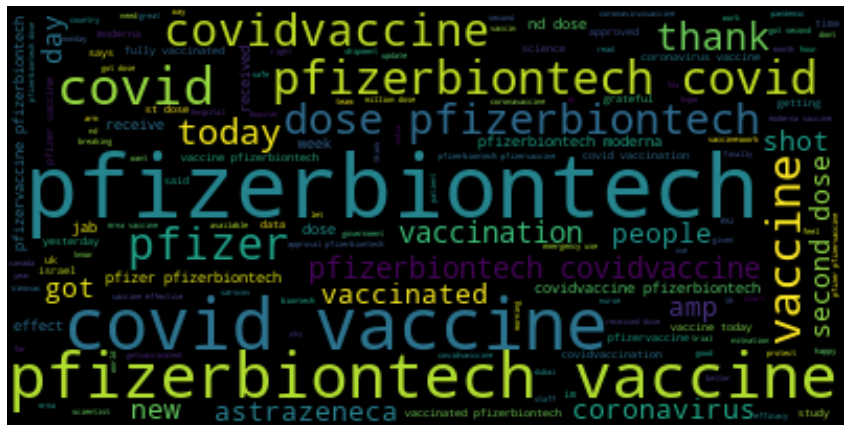

In [47]:
text = " ".join(i for i in data.clean_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords,
                      background_color="black").generate(text)

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

###### WordCloud view of the hashtag column

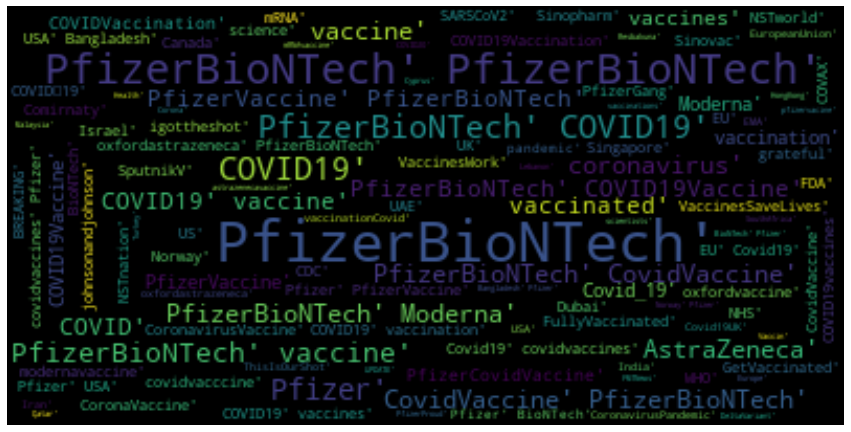

In [48]:
text = " ".join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords,
                      background_color="black").generate(text)

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [49]:
data.head(2)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,userhandles,clean_text,ner
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,[],folks said daikon paste treat cytokine storm p...,folks said daikon paste treat cytokine storm p...
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,[],coronavirus sputnikv astrazeneca pfizerbiontec...,coronavirus sputnikv astrazeneca pfizerbiontec...


In [50]:
#pip install -U pip setuptools wheel


In [51]:
#pip install -U spacy

In [52]:
#pip -m spacy download en_core_web_sm


In [53]:
#import spacy
#nlp = spacy.load("en_core_web_sm")


TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [55]:
#nlp.pipe_names

In [56]:

#def perform_ner(ner):
    #doc = nlp(ner)
    #entities = [(ent.text, ent.label_) for ent in doc.ents]
    #return entities

In [57]:
#data['ner'] = data['clean_text'].apply(perform_ner)
#data

In [58]:
dat = data[['id','source', 'is_retweet', 'clean_text']]
dat

,id,source,is_retweet,clean_text
0,1340539111971516416,Twitter for Android,False,folks said daikon paste treat cytokine storm p...
2,1337858199140118533,Twitter for Android,False,coronavirus sputnikv astrazeneca pfizerbiontec...
6,1337851215875608579,Twitter Web App,False,bit sad claim fame success vaccination patriot...
9,1337842295857623042,Twitter Web App,False,covidvaccine states start getting covidvaccine...
10,1337841934170255365,Twitter Web App,False,deaths closing mark millions people wait pfiz...
...,...,...,...,...
11011,1461054395882344452,Twitter for Android,False,pfizerbiontech given worse headache astrazeneca
11012,1460982017173114880,Hootsuite Inc.,False,yes children ages years receive onethird adul...
11013,1460977748449574912,Twitter for Android,False,harlequins coyq booster time pfizerbiontech as...
11014,1460966011243532290,Twitter for Android,False,rd pfizerbiontech month dubai uae


# Vader Sentiment Analysis Score

*VADER* (Valence Aware Dictionary and sEntiment Reasoner) is a sentiment analysis tool specifically designed for analyzing social media texts. It is a rule-based approach that uses a combination of lexical and grammatical heuristics to determine the sentiment of a given text

In [59]:
data['clean_text'].isnull().sum()

0

In [60]:
import nltk

In [61]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [62]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [63]:
sia = SentimentIntensityAnalyzer()

In [64]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(dat.iterrows(),total = len(dat)):
    text = row['clean_text']
    myid  = row['id']
    res[myid]= sia.polarity_scores(text)
    


  0%|          | 0/6467 [00:00<?, ?it/s]

In [65]:
#T flips everythin horizontally
pd.DataFrame(res).T

,neg,neu,pos,compound
1340539111971516416,0.000,0.748,0.252,0.4019
1337858199140118533,0.000,0.833,0.167,0.2500
1337851215875608579,0.166,0.481,0.353,0.5423
1337842295857623042,0.000,1.000,0.000,0.0000
1337841934170255365,0.000,1.000,0.000,0.0000
...,...,...,...,...
1461054395882344452,0.437,0.563,0.000,-0.4767
1460982017173114880,0.000,0.816,0.184,0.4019
1460977748449574912,0.000,1.000,0.000,0.0000
1460966011243532290,0.000,1.000,0.000,0.0000


In [66]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index': 'id'})
vaders = vaders.merge(dat, how = 'left')

In [68]:
vaders.head(10)

,id,neg,neu,pos,compound,source,is_retweet,clean_text
0,1340539111971516416,0.000,0.748,0.252,0.4019,Twitter for Android,False,folks said daikon paste treat cytokine storm p...
1,1337858199140118533,0.000,0.833,0.167,0.2500,Twitter for Android,False,coronavirus sputnikv astrazeneca pfizerbiontec...
2,1337851215875608579,0.166,0.481,0.353,0.5423,Twitter Web App,False,bit sad claim fame success vaccination patriot...
3,1337842295857623042,0.000,1.000,0.000,0.0000,Twitter Web App,False,covidvaccine states start getting covidvaccine...
4,1337841934170255365,0.000,1.000,0.000,0.0000,Twitter Web App,False,deaths closing mark millions people wait pfiz...
5,1337789467038523394,0.000,1.000,0.000,0.0000,Twitter for iPhone,False,trump announces vaccine rollout hoursthe amer...
6,1337789191598575616,0.000,1.000,0.000,0.0000,Twitter Web App,False,updated yellowfever amp covid immunitypassport...
7,1337783770070409218,0.000,1.000,0.000,0.0000,TweetDeck,False,coronavirus iran reports new cases deaths h...
8,1337781178665816064,0.198,0.660,0.142,-0.1531,Twitter for Android,False,rake billions expensive covidvaccine refuses c...
9,1337776763384958976,0.316,0.516,0.168,-0.3182,Twitter for iPhone,False,trump administration failed deliver vaccine pr...
